In [6]:
# Breast and Leukemia Analysis: Filter, Wrapper, Reduction, Clustering, Modeling, Ensemble, Results
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
breast_df = pd.read_csv(r"../data/Breast.csv")
leukemia_df = pd.read_csv(r"../data/Leukemia.csv")

In [7]:
# Feature Selection Function
def select_features_with_anova_rfe(df, label_column, k=100):
    y = df[label_column]
    X = df.drop(columns=[label_column])
    if y.dtype == 'object':
        y = LabelEncoder().fit_transform(y)
    X = X.apply(pd.to_numeric, errors='coerce').fillna(0)
    X_std = StandardScaler().fit_transform(X)
    anova_selector = SelectKBest(score_func=f_classif, k=k)
    X_anova = anova_selector.fit_transform(X_std, y)
    estimator = LogisticRegression(max_iter=1000, solver='liblinear')
    rfe_selector = RFE(estimator, n_features_to_select=int(k / 2), step=0.1)
    X_rfe = rfe_selector.fit_transform(X_anova, y)
    return X_rfe, y

# Apply feature selection
X_breast, y_breast = select_features_with_anova_rfe(breast_df, 'Class')
X_leukemia, y_leukemia = select_features_with_anova_rfe(leukemia_df, 'CLASS')

c:\Users\Al Haitham\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [   56   121   210   358   642   755   776   824   889   942  1083  1193
  1204  1261  1299  1374  1388  1547  1736  1747  1985  2045  2205  2298
  2333  2370  2402  2453  2702  3019  3294  3363  3477  3481  3539  3577
  3655  3797  3836  3857  3910  4005  4400  4407  4423  4436  4491  4513
  4602  4673  4788  4947  5003  5010  5097  5190  5254  5260  5295  5449
  5495  5578  5645  5666  5810  5820  5893  5915  5949  6085  6092  6266
  6357  6387  6478  6652  6813  6920  7054  7075  7218  7232  7299  7359
  7371  7468  7502  7535  7593  7643  7712  7868  7879  7899  7905  7913
  7958  7993  7996  8176  8530  8574  8760  8872  9039  9117  9169  9486
  9528  9543  9550  9587  9623  9648  9935  9987 10066 10125 10195 10199
 10235 10340 10344 10351 10372 10430 10479 10482 10493 10498 10713 10789
 10852 10865 10927 10944 10952 11162 1117

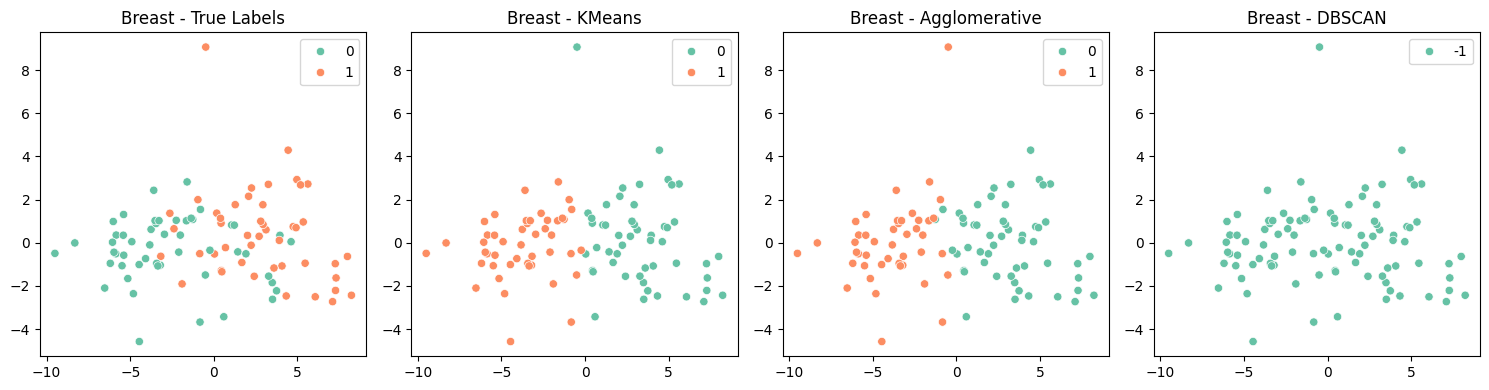

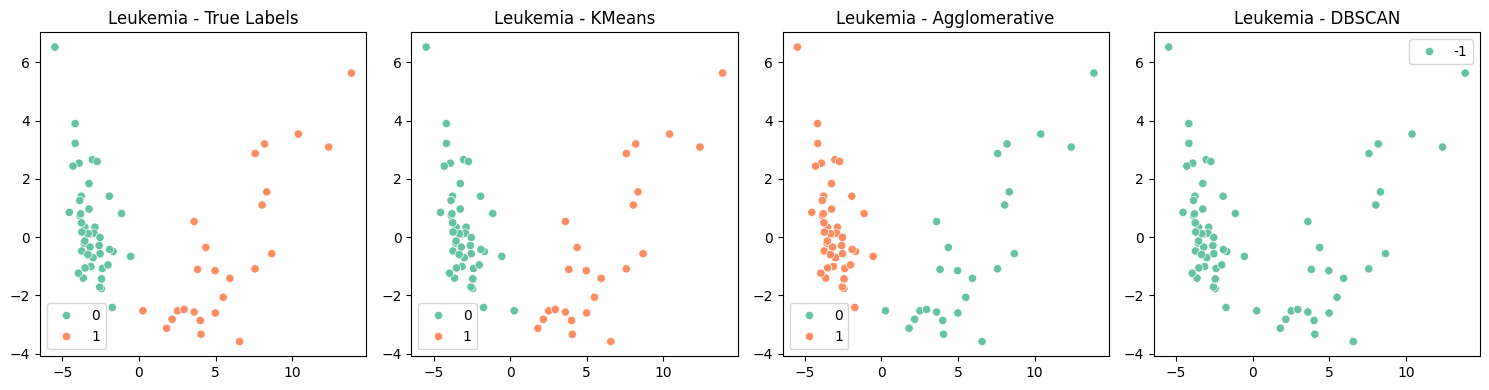

In [8]:
# PCA and Clustering Visualization
def pca_and_clustering(X, y, title_prefix):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    kmeans = KMeans(n_clusters=len(np.unique(y)), random_state=0)
    y_kmeans = kmeans.fit_predict(X)
    agglom = AgglomerativeClustering(n_clusters=len(np.unique(y)))
    y_agglom = agglom.fit_predict(X)
    dbscan = DBSCAN(eps=2, min_samples=5)
    y_dbscan = dbscan.fit_predict(X)
    plt.figure(figsize=(15, 4))
    for i, (labels, title) in enumerate(zip([y, y_kmeans, y_agglom, y_dbscan],
                                          ['True Labels', 'KMeans', 'Agglomerative', 'DBSCAN'])):
        plt.subplot(1, 4, i+1)
        sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2')
        plt.title(f'{title_prefix} - {title}')
    plt.tight_layout()
    plt.show()

# Visualize clustering
pca_and_clustering(X_breast, y_breast, "Breast")
pca_and_clustering(X_leukemia, y_leukemia, "Leukemia")


KNN - Breast Dataset
              precision    recall  f1-score   support

           0       0.64      1.00      0.78         9
           1       1.00      0.55      0.71        11

    accuracy                           0.75        20
   macro avg       0.82      0.77      0.74        20
weighted avg       0.84      0.75      0.74        20

Confusion Matrix:
[[9 0]
 [5 6]]

SVM - Breast Dataset
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         9
           1       1.00      0.73      0.84        11

    accuracy                           0.85        20
   macro avg       0.88      0.86      0.85        20
weighted avg       0.89      0.85      0.85        20

Confusion Matrix:
[[9 0]
 [3 8]]

Neural Network - Breast Dataset
              precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.88      0.64      0.74        11

    accuracy                           

C:\Users\Al Haitham\AppData\Local\Temp\ipykernel_15868\4163288301.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


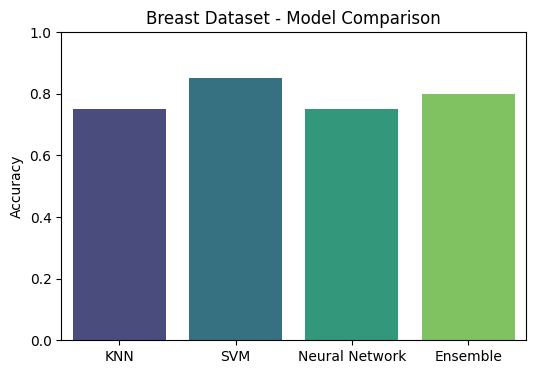


KNN - Leukemia Dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Confusion Matrix:
[[12  0]
 [ 0  3]]

SVM - Leukemia Dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Confusion Matrix:
[[12  0]
 [ 0  3]]

Neural Network - Leukemia Dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         3

    accuracy             

C:\Users\Al Haitham\AppData\Local\Temp\ipykernel_15868\4163288301.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


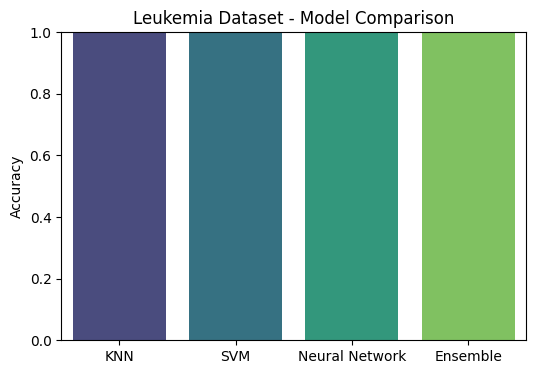

In [9]:
# Model Training and Ensemble Evaluation
def run_classification_models(X, y, dataset_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    knn = KNeighborsClassifier()
    svm = SVC(probability=True)
    nn = MLPClassifier(max_iter=1000, random_state=42)
    ensemble = VotingClassifier(estimators=[
        ('knn', knn),
        ('svm', svm),
        ('nn', nn)
    ], voting='soft')
    models = {'KNN': knn, 'SVM': svm, 'Neural Network': nn, 'Ensemble': ensemble}
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc
        print(f"\n{name} - {dataset_name} Dataset")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
    plt.figure(figsize=(6, 4))
    sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
    plt.ylabel("Accuracy")
    plt.title(f"{dataset_name} Dataset - Model Comparison")
    plt.ylim(0, 1)
    plt.show()

run_classification_models(X_breast, y_breast, "Breast")
run_classification_models(X_leukemia, y_leukemia, "Leukemia")